In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'C:\Users\Lenovo\Desktop\heart_disease_data.csv')
print(data.head())
print(data.shape)
print(data.info)
print(data.isnull().sum())
print(data.describe())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
(303, 14)
<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236  

          age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
0    0.708333  1.0  1.000000  0.481132  0.244292  1.0      0.0  0.603053   
1    0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.5  0.885496   
2    0.250000  0.0  0.333333  0.339623  0.178082  0.0      0.0  0.770992   
3    0.562500  1.0  0.333333  0.245283  0.251142  0.0      0.5  0.816794   
4    0.583333  0.0  0.000000  0.245283  0.520548  0.0      0.5  0.702290   
..        ...  ...       ...       ...       ...  ...      ...       ...   
298  0.583333  0.0  0.000000  0.433962  0.262557  0.0      0.5  0.396947   
299  0.333333  1.0  1.000000  0.150943  0.315068  0.0      0.5  0.465649   
300  0.812500  1.0  0.000000  0.471698  0.152968  1.0      0.5  0.534351   
301  0.583333  1.0  0.000000  0.339623  0.011416  0.0      0.5  0.335878   
302  0.583333  0.0  0.333333  0.339623  0.251142  0.0      0.0  0.786260   

     exang   oldpeak  slope    ca      thal  target  
0      0.0  0.370968    0.0  0.00

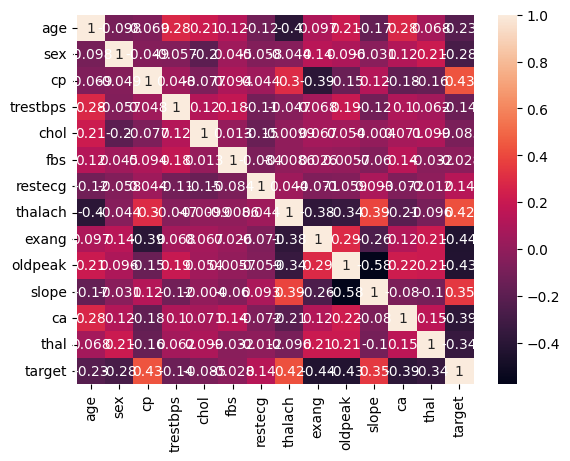

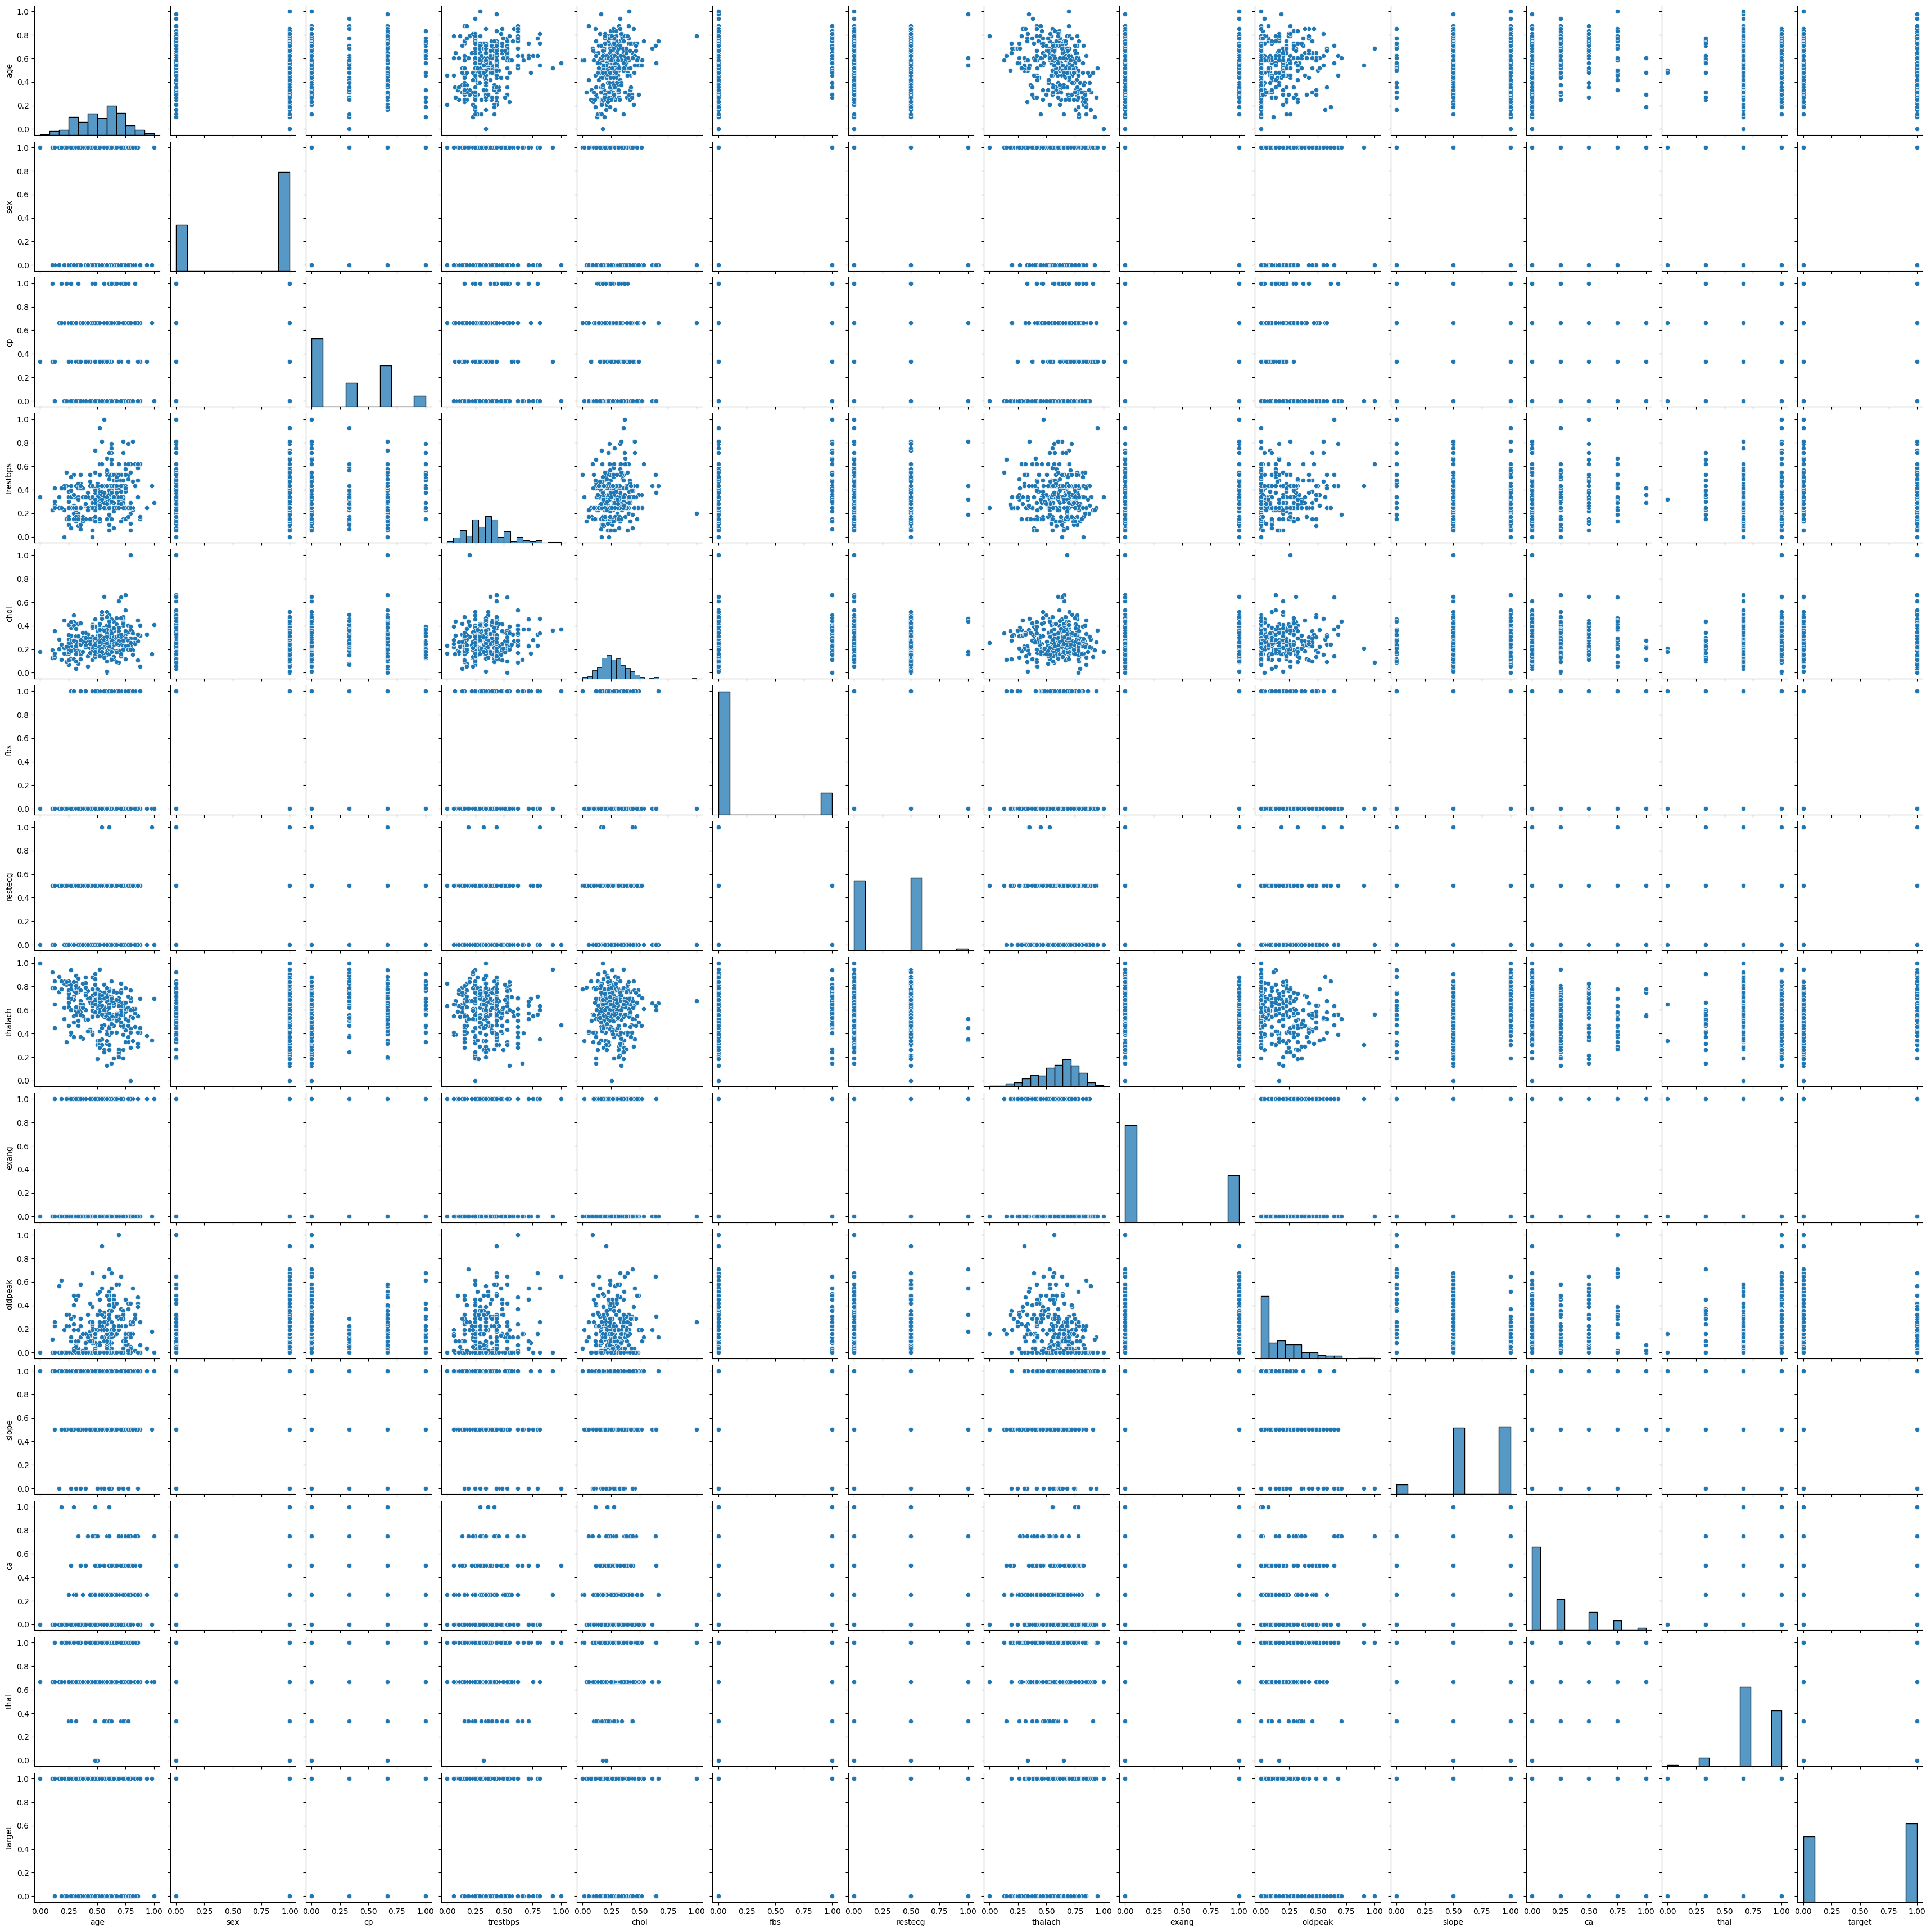

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [7]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
scale=preprocessing.MinMaxScaler()
scaled_data=scale.fit_transform(data)
scaled_data=pd.DataFrame(scaled_data,columns=data.columns)
print(scaled_data)
data_correlation=scaled_data.corr()
print(data_correlation)
sns.heatmap(data_correlation,annot=True)
plt.show()
sns.pairplot(scaled_data)
plt.show()
print(x)
print(y)

In [ ]:
########################################## ==> model 1 (LogisticRegression)<==###########################################################

#by using Holdout Method

x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2)
print(x.shape, x_train.shape, x_test.shape)
model = LogisticRegression()
model.fit(x_train,y_train)
x_train_predict = model.predict(x_train)
accuracy = accuracy_score(x_train_predict,y_train)
print('the accuracy of the train data is',accuracy)
# accuracy on test data
X_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy on Test data : ', test_data_accuracy)

(303, 13) (242, 13) (61, 13)
the accuracy of the train data is 0.8512396694214877
Accuracy on Test data :  0.819672131147541


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#if the accuracy of the train data is far superior to the test data the model become  overfiting


input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

The Person does not have a Heart Disease


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
########################################## ==> model 2 (K-Nearest Neighbors) <==###########################################################

#by using Validation SetApproach

from sklearn import neighbors
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]
X_train, X_test, Y_train, Y_test=train_test_split(X, Y,test_size=0.5)

model_2 =neighbors.KNeighborsClassifier(n_neighbors=5)
model_2.fit(X_train,Y_train)
x_train_predict = model_2.predict(X_train)
accuracy = accuracy_score(x_train_predict,Y_train)
print('the accuracy of the train data is',accuracy)
X_test_prediction = model_2.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)


the accuracy of the train data is 0.7218543046357616
Accuracy on Test data :  0.6776315789473685


In [ ]:
########################################## ==> model 3 ( Naïve Bayes) <==###########################################################

#by using Holdout Method

from sklearn.naive_bayes import GaussianNB
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]
X_train, X_test, Y_train, Y_test=train_test_split(X, Y,test_size=0.3)
model_3 =GaussianNB()
model_3.fit(X_train,Y_train)
x_train_predict = model_3.predict(X_train)
accuracy = accuracy_score(x_train_predict,Y_train)
print('the accuracy of the train data is',accuracy)
X_test_prediction = model_3.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)


the accuracy of the train data is 0.8537735849056604
Accuracy on Test data :  0.8131868131868132


In [ ]:
########################################## ==> model 4 (Decision Tree Classification) <==########################################################

#by using Holdout Method

from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test=train_test_split(X, Y,test_size=0.3)
model_4 =clf = DecisionTreeClassifier(criterion="entropy")
model_4.fit(X_train,Y_train)
x_train_predict = model_4.predict(X_train)
accuracy = accuracy_score(x_train_predict,Y_train)
print('the accuracy of the train data is',accuracy)
X_test_prediction = model_4.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)


the accuracy of the train data is 1.0
Accuracy on Test data :  0.7472527472527473


the accuracy of the train data is 0.9811320754716981
Accuracy on Test data :  0.8241758241758241


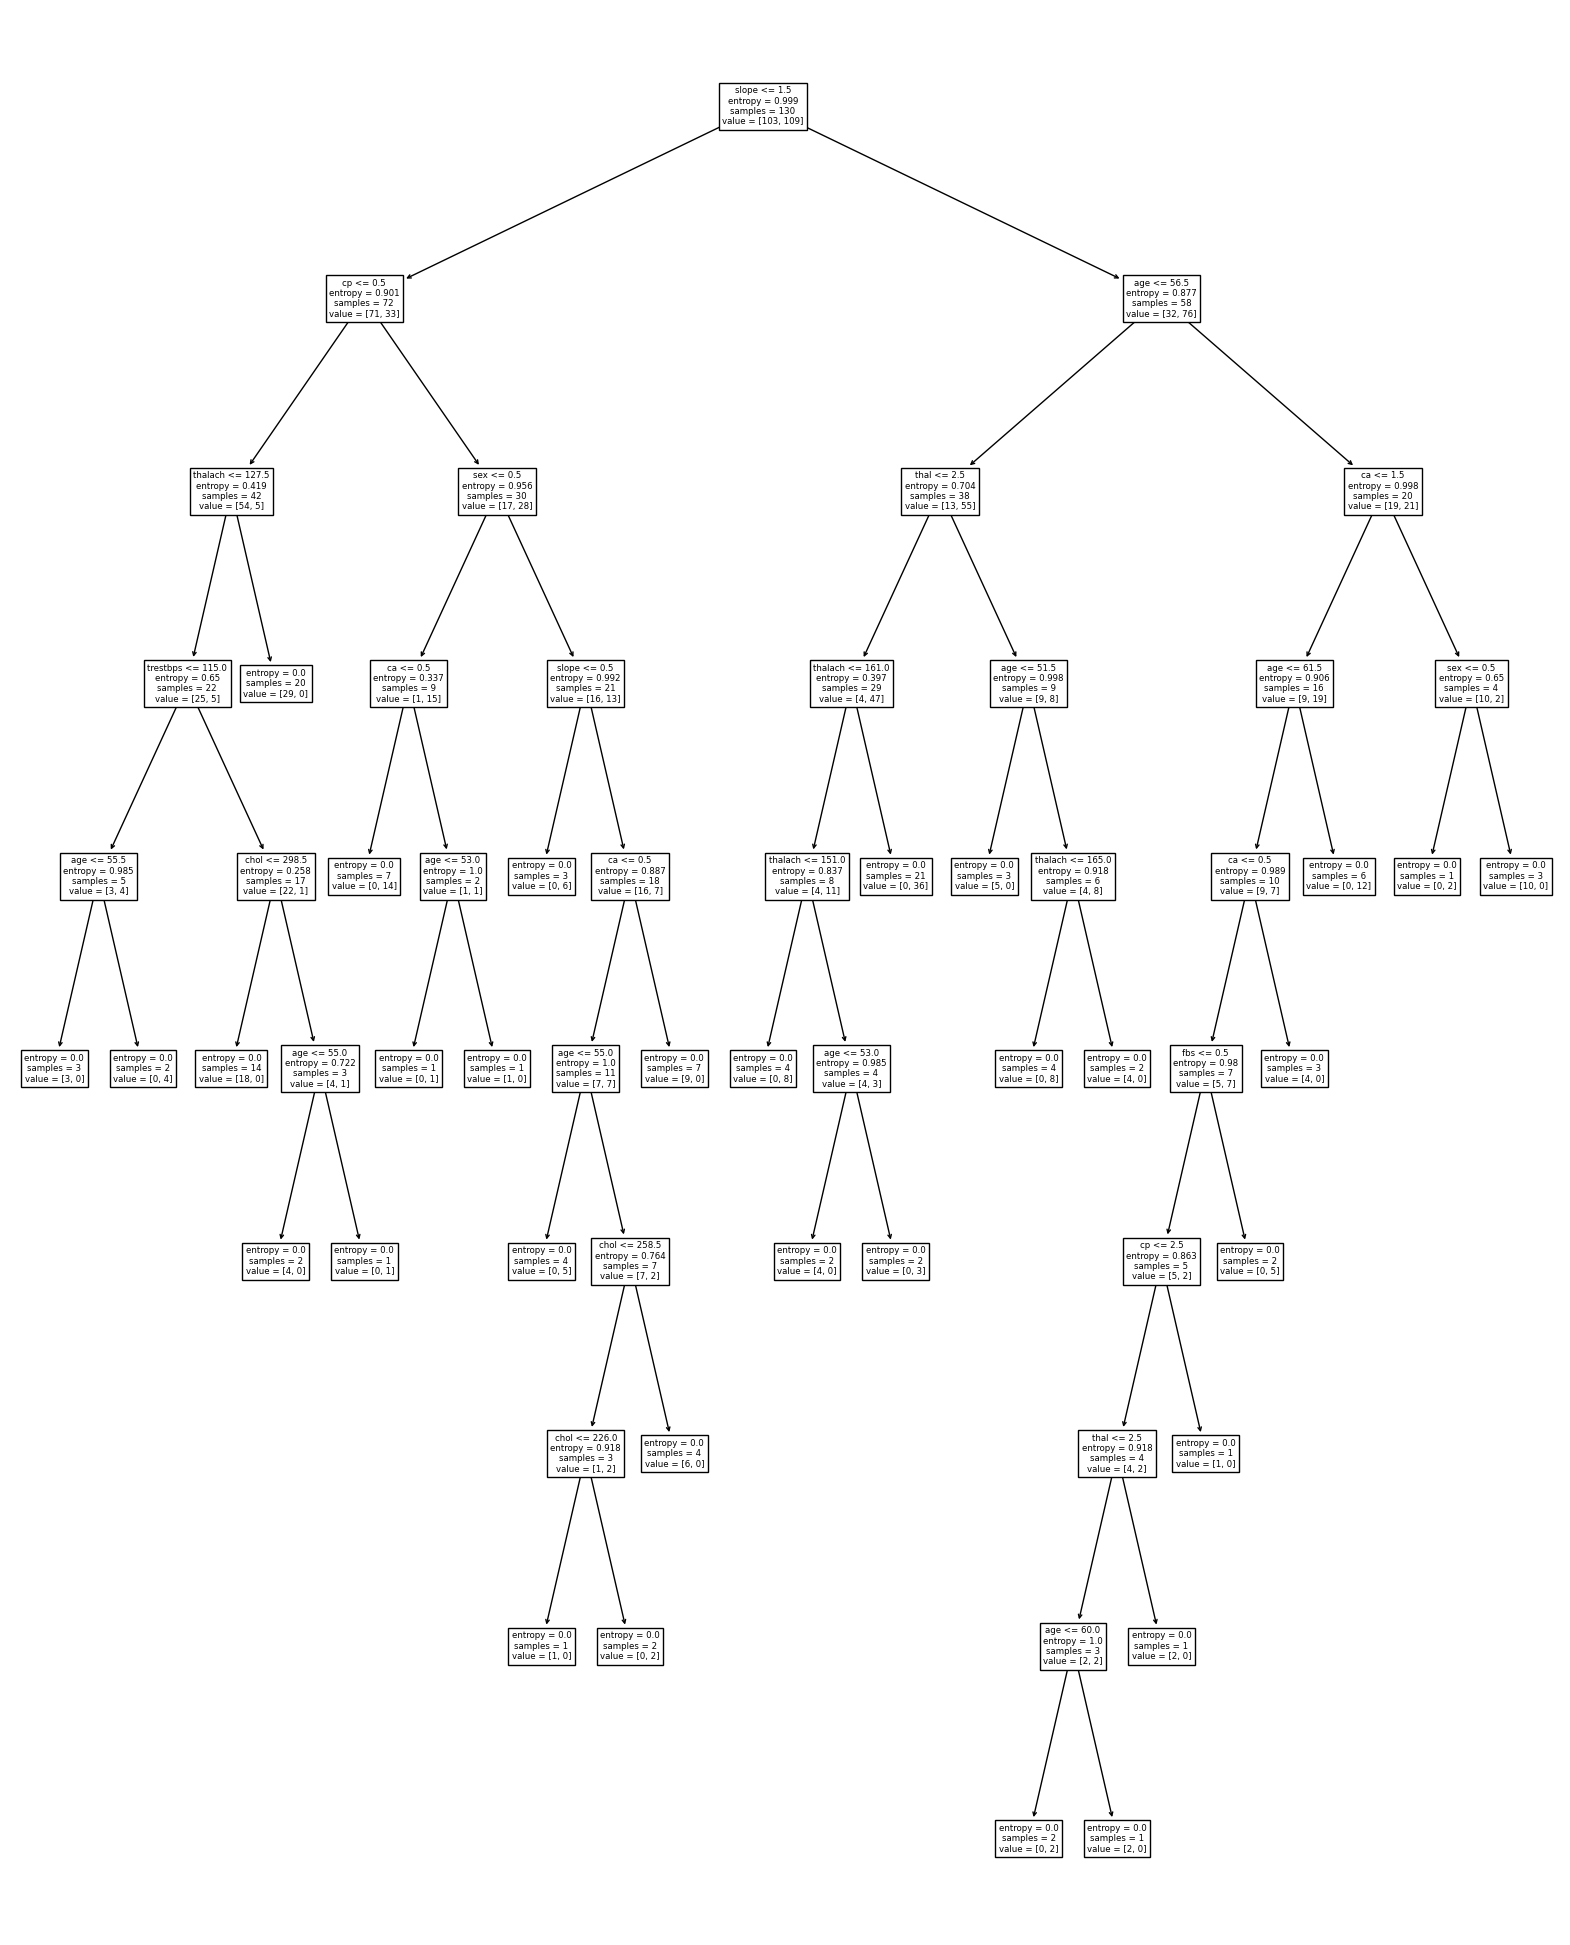

In [ ]:
########################################## ==> model 5 (Random Forest) <==###########################################################

#by using Holdout Method


from sklearn.ensemble import RandomForestClassifier as RF
X_train, X_test, Y_train, Y_test=train_test_split(X, Y,test_size=0.3)
model_5 =clf =RF(n_estimators= 5,criterion="entropy")
model_5.fit(X_train,Y_train)
x_train_predict = model_5.predict(X_train)
accuracy = accuracy_score(x_train_predict,Y_train)
print('the accuracy of the train data is',accuracy)
X_test_prediction = model_5.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 25))
tree.plot_tree(model_5.estimators_[0], feature_names=X.columns)
tree.plot_tree(model_5.estimators_[1], feature_names=X.columns)
plt.show()